In [167]:
import pandas as pd
import numpy as np

In [168]:
sismos_eeuu= pd.read_csv('datasets/Datos_USA.csv')

In [169]:
sismos_eeuu.head()

,id,Magnitud,primer reg,Ult reg,properties.felt,cdi,mmi,Posivilidad tsunami,Importancia del evento,net,ids,nst,Dist Horizontal epicentro,Brecha azimutal,estado,Longitud,Latitud,Profundidad
0,us6000kbl9,2.50,2023-05-13 00:22:34.350,2023-05-13 01:02:32.040,NaN,NaN,NaN,0,96,us,",us6000kbl9,",10.0,0.46000,119.00,Kansas,-99.499500,39.235400,3.69
1,nn00859459,2.80,2023-05-12 22:29:14.464,2023-05-12 23:43:48.040,NaN,NaN,NaN,0,121,nn,",us6000kbkj,nn00859459,",14.0,0.22000,64.37,Nevada,-118.914500,38.402200,11.50
2,nc73887311,2.91,2023-05-12 20:57:31.130,2023-05-12 23:55:14.063,NaN,NaN,NaN,0,130,nc,",nc73887311,us6000kbjl,",24.0,0.10920,182.00,CA,-121.261330,35.747665,3.66
3,nc73887306,2.90,2023-05-12 20:57:24.320,2023-05-12 23:54:10.059,NaN,NaN,NaN,0,129,nc,",nc73887306,",12.0,0.10120,180.00,CA,-121.248833,35.747501,4.59
4,ci40223751,2.77,2023-05-12 17:30:47.620,2023-05-12 23:47:37.500,NaN,NaN,NaN,0,118,ci,",ci40223751,us6000kbhy,",94.0,0.07689,20.00,CA,-116.735167,33.979167,17.35


In [170]:
sismos_eeuu.info

<bound method DataFrame.info of                id  Magnitud               primer reg                  Ult reg  \
0      us6000kbl9      2.50  2023-05-13 00:22:34.350  2023-05-13 01:02:32.040   
1      nn00859459      2.80  2023-05-12 22:29:14.464  2023-05-12 23:43:48.040   
2      nc73887311      2.91  2023-05-12 20:57:31.130  2023-05-12 23:55:14.063   
3      nc73887306      2.90  2023-05-12 20:57:24.320  2023-05-12 23:54:10.059   
4      ci40223751      2.77  2023-05-12 17:30:47.620  2023-05-12 23:47:37.500   
...           ...       ...                      ...                      ...   
19995  nc72885755      2.50  2017-09-05 20:02:09.360  2017-12-27 06:54:44.502   
19996  us2000ag9h      2.50  2017-09-05 19:23:59.900  2017-12-07 20:00:14.040   
19997  uw61303577      2.82  2017-09-05 15:48:09.530  2017-12-07 20:00:13.040   
19998  us2000ag3c      2.70  2017-09-05 14:46:41.690  2017-12-07 20:00:13.040   
19999  us2000ag1p      2.90  2017-09-05 11:38:20.480  2017-12-07 20:00:13.040

In [171]:
sismos_eeuu = sismos_eeuu.loc[:, ['Magnitud', 'Longitud', 'Latitud', 'Profundidad']]

In [172]:
sismos_eeuu.head()

,Magnitud,Longitud,Latitud,Profundidad
0,2.50,-99.499500,39.235400,3.69
1,2.80,-118.914500,38.402200,11.50
2,2.91,-121.261330,35.747665,3.66
3,2.90,-121.248833,35.747501,4.59
4,2.77,-116.735167,33.979167,17.35


In [173]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Scikit-learn proporciona una variedad de algoritmos de clustering para analizar y agrupar datos. En particular, KMeans es un algoritmo de 
#clustering muy utilizado que agrupa los datos en k grupos (donde k es un número predefinido) según la similitud entre ellos. 
#El objetivo de este algoritmo es minimizar la suma de las distancias al cuadrado entre cada punto y su centroide correspondiente.

#Matplotlib.pyplot proporciona herramientas para crear gráficos y visualizaciones en Python. Esta librería es muy útil para visualizar los 
#resultados de los análisis de datos, como los resultados de los algoritmos de clustering. Ofrece una amplia variedad de opciones de visualización, 
#incluyendo gráficos de líneas, de barras, de dispersión, entre otros.

In [174]:
max_magnitud = sismos_eeuu['Magnitud'].max()
min_magnitud = sismos_eeuu['Magnitud'].min()

In [175]:
print(max_magnitud)

7.1


In [176]:
print(min_magnitud)

2.5


Magnitud de Escala Richter
3.5 - 5.4 A menudo se siente, pero sólo causa daños menores. 
5.5 - 6.0 Ocasiona daños ligeros a edificios. 
6.1 - 6.9 Puede ocasionar daños severos en áreas muy pobladas. 
7.0 - 7.9 Terremoto mayor.

Vamos a asociar una columna llamada peligrosidad al datafrmae, que depende únicamente de la magnitud del sismo (más adelante podemos agregarle mas variables) siguiendo los rangos de la Escala de Ritcher

In [177]:
Escala_Ritcher = [
    (sismos_eeuu['Magnitud'] >= 7.0),
    (sismos_eeuu['Magnitud'] > 6.0)  & (sismos_eeuu['Magnitud'] <7.0),
    (sismos_eeuu['Magnitud'] > 5.4) & (sismos_eeuu['Magnitud'] <=6.0),
    (sismos_eeuu['Magnitud'] <= 5.4)]
peligrosidad = [3, 2, 1, 0]                           
                                                      
sismos_eeuu['Peligrosidad'] = np.select(Escala_Ritcher, peligrosidad, default='Not Specified')

In [178]:
sismos_eeuu.sample(10)

,Magnitud,Longitud,Latitud,Profundidad,Peligrosidad
5600,2.63,-115.642000,33.183500,4.690000,0
1716,2.70,-104.310237,31.656222,8.008252,0
2157,2.52,-111.102667,44.745000,11.120000,0
5320,3.40,-105.379300,43.754200,0.000000,0
13812,2.66,-117.521333,35.700000,10.670000,0
13801,3.04,-117.584667,35.658333,9.780000,0
3537,3.10,-106.840900,45.169400,0.000000,0
7879,3.45,-115.586833,33.067000,14.080000,0
14202,2.52,-117.706667,35.924500,2.470000,0
13878,2.66,-117.917667,36.113000,5.580000,0


In [179]:
sismos_eeuu[sismos_eeuu['Magnitud'] > 5.5]  #Para chequear que se haya agregado correctamente, ya que con en el head solo me salian registros 
#con magnitudes peuqeñas

,Magnitud,Longitud,Latitud,Profundidad,Peligrosidad
1027,6.40,-124.423000,40.525000,17.91,2
1239,6.20,-116.390700,30.793600,10.00,2
1381,6.10,-112.310600,28.157300,10.00,2
3719,6.20,-124.298000,40.390167,27.04,2
3720,5.65,-124.626000,40.297833,16.51,1
5300,6.00,-119.499833,38.507500,7.45,1
8957,5.80,-117.975167,36.446833,4.66,1
9290,5.51,-117.428167,35.614833,8.44,1
10258,6.50,-117.849700,38.168900,2.70,2
11179,6.50,-115.117500,44.464600,12.06,2


In [180]:
nan_count = sismos_eeuu.isna().sum().sum()
print("Valores NaN en DataFrame original:", nan_count)

Valores NaN en DataFrame original: 0


In [181]:
sismos_eeuu = sismos_eeuu.dropna()

In [199]:
#Tomamos una muestra aleatoria de 12000 registros

sismos_eeuu =sismos_eeuu.sample(n=12000, random_state=10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7656\357200677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = sismos_eeuu.corr()


[Text(0.5, 0, 'Magnitud'),
 Text(1.5, 0, 'Longitud'),
 Text(2.5, 0, 'Latitud'),
 Text(3.5, 0, 'Profundidad')]

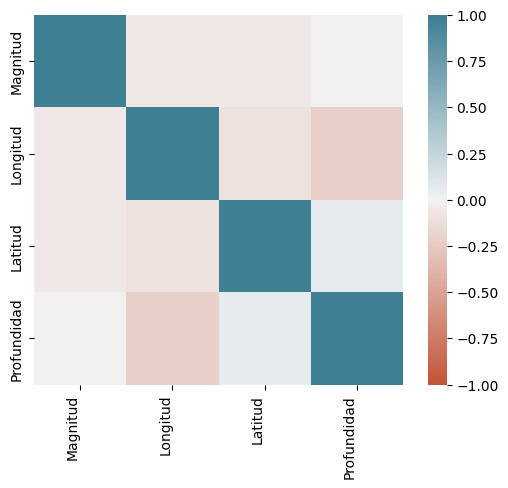

In [183]:
#creamos la matriz de correlacion
matriz_correlacion = sismos_eeuu.corr()
ax = sns.heatmap(
    matriz_correlacion, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

Escalamos datos para comparar la influencia de cada variable de manera más justa, teniendo en cuenta su importancia relativa

In [184]:
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

**SALTAR ESTA PARTE HASTA EL SIGUIENTE AVISO

In [185]:
# Utiliza el método applymap() para intentar convertir todos los elementos del dataframe a float
# Si alguno de los elementos no se puede convertir a float, se generará un error
try:
    sismos_eeuu.applymap(float)
except ValueError as e:
    # El error generado contiene información sobre el elemento que no se pudo convertir a float
    print(e)

In [186]:
columnas_con_error = []
for columna in sismos_eeuu.columns:
    try:
        sismos_eeuu[columna].astype(float)
    except ValueError:
        columnas_con_error.append(columna)
        
fila_error = sismos_eeuu[sismos_eeuu.isin(['Idaho'])].dropna(how='all')
print("La fila que contiene el error está en la columna:", columnas_con_error)
print(fila_error)

La fila que contiene el error está en la columna: []
Empty DataFrame
Columns: [Magnitud, Longitud, Latitud, Profundidad, Peligrosidad]
Index: []


In [52]:
sismos_eeuu = sismos_eeuu.drop(index=19778)

In [53]:
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

ValueError: could not convert string to float: 'tx2021tean'

In [54]:
columnas_con_error = []
for columna in sismos_eeuu.columns:
    try:
        sismos_eeuu[columna].astype(float)
    except ValueError:
        columnas_con_error.append(columna)
        
fila_error = sismos_eeuu[sismos_eeuu.isin(['tx2021tean'])].dropna(how='all')
print("La fila que contiene el error está en la columna:", columnas_con_error)
print(fila_error)

La fila que contiene el error está en la columna: ['id', 'estado']
              id estado  Magnitud  Importancia del evento  \
4376  tx2021tean    NaN       NaN                     NaN   

      Dist Horizontal epicentro  Brecha azimutal  Longitud  Latitud  \
4376                        NaN              NaN       NaN      NaN   

      Profundidad Peligrosidad  
4376          NaN          NaN  


In [55]:
sismos_eeuu = sismos_eeuu.drop(index=4376)

In [56]:
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

ValueError: could not convert string to float: 'nn00746659'

In [57]:
# Escala los datos usando MinMaxScaler
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

# Busca las columnas con errores
columnas_con_error = []
for columna in sismos_eeuu.columns:
    try:
        sismos_eeuu[columna].astype(float)
    except ValueError:
        columnas_con_error.append(columna)

# Imprime las columnas con error
print("Las filas con errores se encuentran en las siguientes columnas:", columnas_con_error)

# Borra las filas con errores
for col in columnas_con_error:
    sismos_eeuu = sismos_eeuu[~sismos_eeuu[col].isin(['tx2021tean'])]

# Imprime la cantidad de filas borradas
print("Se borraron", len(columnas_con_error), "filas con errores")

# Escala los datos de nuevo (ahora sin los datos erróneos)
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

ValueError: could not convert string to float: 'nn00746659'

In [58]:

# Copia del dataframe original
sismos_eeuu_copy = sismos_eeuu.copy()

# Lista para almacenar las columnas con errores
columnas_con_error = []

# Iterar sobre las columnas del dataframe
for columna in sismos_eeuu_copy.columns:
    try:
        # Convertir la columna a tipo float
        sismos_eeuu_copy[columna] = sismos_eeuu_copy[columna].astype(float)
    except ValueError:
        # Registrar la columna con problemas
        columnas_con_error.append(columna)

# Eliminar las filas con valores nulos
sismos_eeuu_copy.dropna(inplace=True)

# Escalar los valores del dataframe
x = sismos_eeuu_copy.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

# Imprimir las columnas con errores
print("Las columnas con errores son:", columnas_con_error)

# Imprimir las filas con valores nulos
fila_error = sismos_eeuu[sismos_eeuu.isin(['nn00746659'])].dropna(how='all')
print("La fila que contiene el error es:", fila_error)

# Eliminar la fila con el valor erróneo
sismos_eeuu.drop(fila_error.index, inplace=True)

ValueError: could not convert string to float: 'nn00746659'

**LISTO, HASTA ACÁ. AHORA SEGUIMOS

In [187]:
X_norm

,0,1,2,3,4
0,0.086957,0.228562,0.705837,0.135626,0.0
1,0.065217,0.346885,0.274389,0.139690,0.0
2,0.108696,0.118050,0.531333,0.125966,0.0
3,0.021739,0.165684,0.774234,0.173622,0.0
4,0.391304,0.353391,0.271056,0.158233,0.0
...,...,...,...,...,...
11995,0.043478,0.456596,0.338887,0.044822,0.0
11996,0.023913,0.119713,0.453360,0.068779,0.0
11997,0.152174,0.330633,0.755758,0.044822,0.0
11998,0.043478,0.344837,0.276325,0.100618,0.0


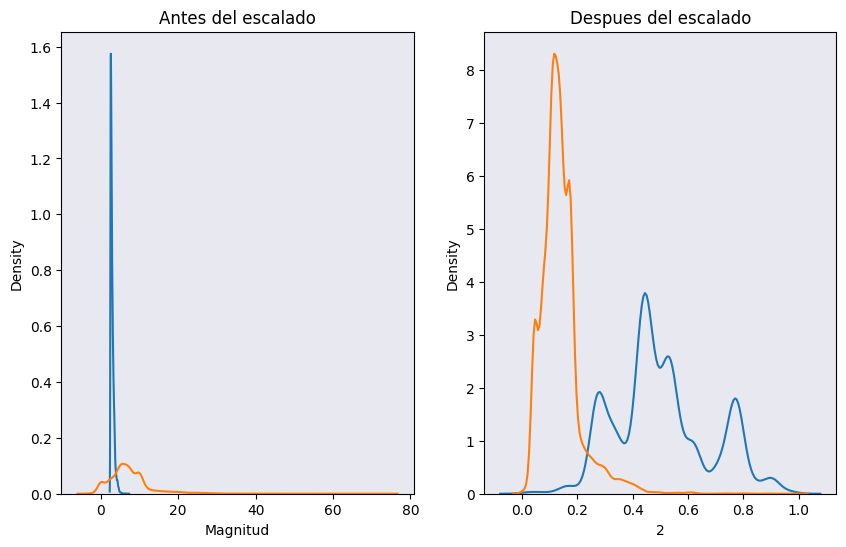

In [188]:
#Graficos de las distribuciones de densidad de probabilidad (KDE, Kernel Density Estimation) de las columnas "Magnitud" y "Profundidad"
#antes y despues del escalado de datos.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

ax1.set_facecolor('#E8E8F1')
ax2.set_facecolor('#E8E8F1')

ax1.set_title('Antes del escalado')
sns.kdeplot(sismos_eeuu['Magnitud'], ax=ax1)
sns.kdeplot(sismos_eeuu['Profundidad'], ax=ax1)

ax2.set_title('Despues del escalado')
sns.kdeplot(X_norm[2], ax=ax2)
sns.kdeplot(X_norm[3], ax=ax2)

plt.show()

In [200]:
#Generamos los PCA para reducir la dimensionalidad de un conjunto de datos.
#(La idea principal detrás del PCA es encontrar las características principales o los componentes principales que resuman la mayor cantidad 
#de variabilidad en los datos originales. Los componentes principales son combinaciones lineales de las características originales del conjunto 
#de datos.)

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [201]:
reduced

,0,1
0,-0.184154,0.080888
1,0.261098,0.059100
2,-0.051534,-0.077690
3,-0.272333,0.042933
4,0.274216,0.040351
...,...,...
11995,0.238282,0.194783
11996,0.023746,-0.088127
11997,-0.193327,0.198594
11998,0.260138,0.063727


In [202]:
#análisis de clustering utilizando el algoritmo de KMeans de la librería sklearn.

#especificamos numeros de clusters
kmeans = KMeans(n_clusters=4, n_init=10)
# entrenamos
kmeans = kmeans.fit(reduced)
# predecimos
labels = kmeans.predict(reduced)
# verificamos centroides
centroid = kmeans.cluster_centers_
# guardamos una lista con los clusters
clusters = kmeans.labels_.tolist()

In [203]:
#Ahora vamos a seguir trabjaando con el dataframe reduced creado anteriormente, pero le tengo que añadir algunosdatos del sismos_eeuu

lista_peligrosidad= sismos_eeuu.Peligrosidad.tolist()

In [204]:
reduced['Cluster'] = clusters
reduced['Peligrosidad'] = lista_peligrosidad
reduced.columns = ['A','B','Cluster', 'Peligrosidad']
reduced

,A,B,Cluster,Peligrosidad
0,-0.184154,0.080888,2,0
1,0.261098,0.059100,3,0
2,-0.051534,-0.077690,1,0
3,-0.272333,0.042933,2,0
4,0.274216,0.040351,3,0
...,...,...,...,...
11995,0.238282,0.194783,0,0
11996,0.023746,-0.088127,1,0
11997,-0.193327,0.198594,2,0
11998,0.260138,0.063727,3,0


In [205]:
#vamos a ver cuantos objetos con características similares hay por cada grupo, para eso agrupamos por Cluster
print(reduced.groupby('Cluster').size())

Cluster
0    1367
1    5901
2    2414
3    2318
dtype: int64


In [206]:
#Vamos a ver en nuestra clasificacion de peligrosidad si se parece en algo
print(reduced.groupby('Peligrosidad').size())

Peligrosidad
0    11988
1        6
2        5
3        1
dtype: int64
